<a href="https://colab.research.google.com/github/buxkirill/reboot_DA/blob/main/SQL/homeworks/lesson_5_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student10'
DB_USER_PASSWORD = 'student10_password'
DB_NAME = 'sql_ex_for_student10'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

### --task6 (lesson5) - На занятии
-- Компьютерная фирма: Сделать график со средней ценой по всем товарам по каждому производителю (X: maker, Y: avg_price) на базе view all_products_050521


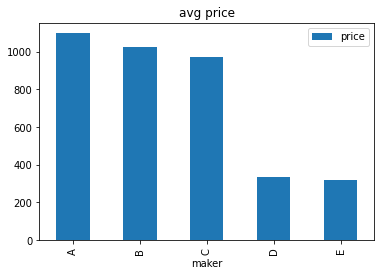

In [ ]:
request = """
SELECT * FROM all_products_050521_second_stream;
"""
df = pd.read_sql_query(request, conn)

df.groupby(by='maker').mean().plot(kind='bar', title='avg price')
plt.show()

### --task11 (lesson5) - Домашнее задание
-- Компьютерная фирма: Построить график с со средней и максимальной ценами на базе products_with_lowest_price (X: maker, Y1: max_price, Y2: avg)price



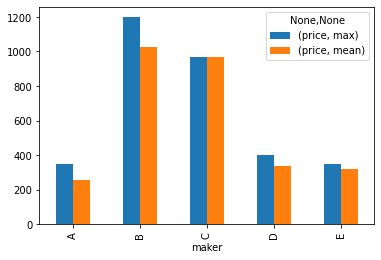

In [ ]:
request = """
SELECT * from products_with_lowest_price_second_stream;
"""
df = pd.read_sql_query(request, conn)

df.groupby(by='maker').agg({"price": [max, np.mean]}).plot(kind='bar')
plt.show()

### --task3 (lesson5) - Домашнее задание
-- Компьютерная фирма: Сделать на базе предыдущенр view график - круговую диаграмму

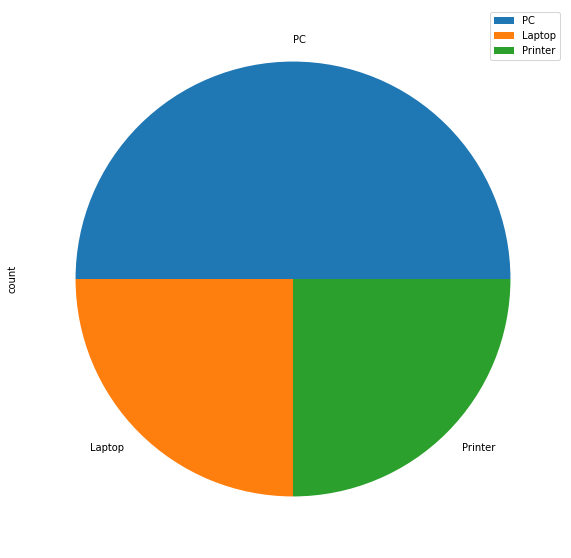

In [12]:
# первоначально создал view с количеством продуктов, а не долями от общего количества. 
# потом исправил, но не получалось удалить view и создать новый 
# Поэтому на диаграмме указан count, а не part.
request = """
SELECT * from distribution_by_type_second_stream;
"""
df = pd.read_sql_query(request, conn)

df.set_index('type').plot.pie(y='count',        # y='part',
                              figsize=(10,10))
plt.show()